TOC

Introduction

Loading and Examining the Data

Heart Disease Prediction Dataset Analysis

Exploratory Data Analysis

Categorical Distributions by Heart Disease

Numerical Distributions & Outliers

Data Cleaning & Preprocessing

Handling Potential Data Issues in RestingBP and Cholesterol

Handling Negative Values and Potential Outliers in Oldpeak

Feature Selection

Building k-NN Classifiers With Individual Features

Building k-NN Classifier With All Selected Features

Conclusion

# Loading and Examining the Data

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("heart_disease_prediction.csv")

# Display dataset overview
display(df.head(), "\n")
print("="*43)
print(" HEART DISEASE PREDICTION DATASET OVERVIEW ")
print("="*43, "\n")
print(df.info(), "\n")
print("="*43)
print(" DATA SUMMARY ")
print("="*43, "\n")
print(df.describe().transpose(), "\n")
print("="*43)
print(" MISSING VALUES ")
print("="*43, "\n")
print(df.isnull().sum(), "\n")

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


'\n'

 HEART DISEASE PREDICTION DATASET OVERVIEW 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None 

 DATA SUMMARY 

              count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.

# 🏥 Heart Disease Prediction Dataset Analysis  

---

## 📊 Dataset Overview  
- **Total Entries**: 918  
- **Total Features**: 12 (Numerical & Categorical)  
- **Missing Values**: None, but potential data quality issues exist.  

---

## 🔍 Feature Breakdown  

### **Demographics & Basic Info**  
- **Age**: Ranges from **28 to 77 years**.  
- **Sex**: Categorical (Male/Female).  

### **Medical Measurements**  
- **RestingBP (Resting Blood Pressure)**: **0–200 mmHg** (A **minimum of 0** suggests possible errors).  
- **Cholesterol**: **0–603 mg/dl** (Possible **0-value inconsistencies**).  
- **MaxHR (Maximum Heart Rate Achieved)**: **60–202 bpm** (Values appear physiologically reasonable).  
- **Oldpeak (ST Depression)**: **Average: 0.88**, but **negative values (-2.6) require review**.  

### **Categorical Health Indicators**  
- **ChestPainType**: Four categories (TA, ATA, NAP, ASY).  
- **FastingBS (Fasting Blood Sugar)**: Binary (0 or 1, where 1 = **FBS > 120 mg/dl**).  
- **RestingECG**: Three categories (Normal, ST, LVH).  
- **ExerciseAngina**: Binary (Y/N).  
- **ST_Slope**: Three categories (Up, Flat, Down).  

### **Target Variable**  
- **HeartDisease**: Binary (0 = No Heart Disease, 1 = Heart Disease).  

---

## 📉 Summary Statistics  

| Feature         | Mean  | Standard Deviation | Notes |
|----------------|-------|--------------------|------------------------|
| **Age**        | 53.5  | 9.43               | Typical patient age. |
| **RestingBP**  | 132.4 | —                  | **Min = 0**, possible data entry error. |
| **Cholesterol**| 198.8 | —                  | **0 values** could indicate missing data. |
| **MaxHR**      | 136.8 | —                  | Appears within normal physiological ranges. |
| **Oldpeak**    | 0.88  | —                  | **Negative values (-2.6) may require review.** |

---

## ⚠️ Data Quality Considerations  
- **No missing values**, but:  
  - **RestingBP & Cholesterol contain 0s**, which may indicate missing or misrecorded data.  
  - **Oldpeak has negative values**, which may require further investigation.  

These potential issues should be addressed before further analysis or model training.  

# Exploratory Data Analysis

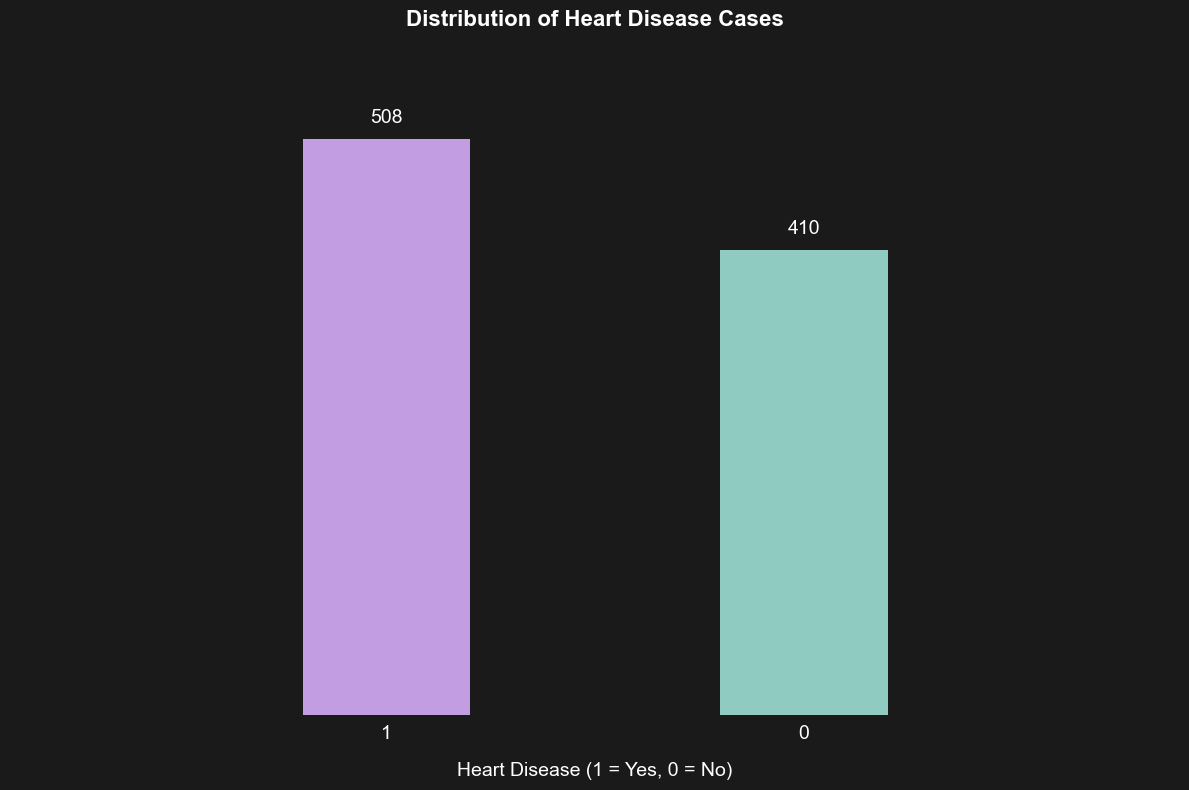

In [6]:
# Custom plot style
sns.set_style("dark")
plt.rcParams.update({
    "axes.facecolor": "#1a1a1a",
    "figure.facecolor": "#1a1a1a",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "xtick.labelsize": 12,
    "ytick.color": "white",
    "ytick.labelsize": 12,
    "grid.color": "gray",
    "axes.titlesize": 16,
    "axes.titleweight": "bold",
    "axes.labelsize": 14,
    "axes.labelpad": 14,
    "axes.titlecolor": "white",
    "axes.edgecolor": "#1a1a1a"
})

# Count occurrences of heart disease cases
heart_disease_counts = df['HeartDisease'].value_counts()

# Create a figure for the bar chart, setting size and background color
plt.figure(figsize=(12, 8), facecolor='#1a1a1a')

# Create a bar plot with custom colors
ax = sns.barplot(
    x=heart_disease_counts.index.astype(str),  # Convert index to string for labels
    y=heart_disease_counts.values,             # Bar heights
    hue=heart_disease_counts.values,           # Use values to differentiate colors
    palette=["#85d5c8", "#c392ec"],            # Custom colors
    legend=False,                              # Hide legend
    width=0.4,                                 # Adjust bar width
    edgecolor='none'
)

# Add title, remove x-axis label, adjust tick styles
ax.set_title("Distribution of Heart Disease Cases", fontsize=16, weight='bold', color="white")
ax.set_xlabel("Heart Disease (1 = Yes, 0 = No)", labelpad=14)
ax.set_ylabel("")
plt.xticks(fontsize=14, color="white")  # Adjust x-axis labels
plt.yticks([], [])                      # Remove y-axis ticks
plt.ylim(0, 600)
ax.margins(x=0.5)

# Add values on top of each bar
for index, value in enumerate(heart_disease_counts.values):
    ax.text(index, value + 10,   # Position text slightly above the bar
            f'{value:,}',        # Format value with commas
            ha='center',         # Center text horizontally
            va='bottom',         # Align text to the bottom
            fontsize=14,         # Font size
            color="white")       # Use white for visibility

# Remove grid borders
sns.despine(bottom=True, left=True)

# Display the plot
plt.tight_layout()
plt.show()

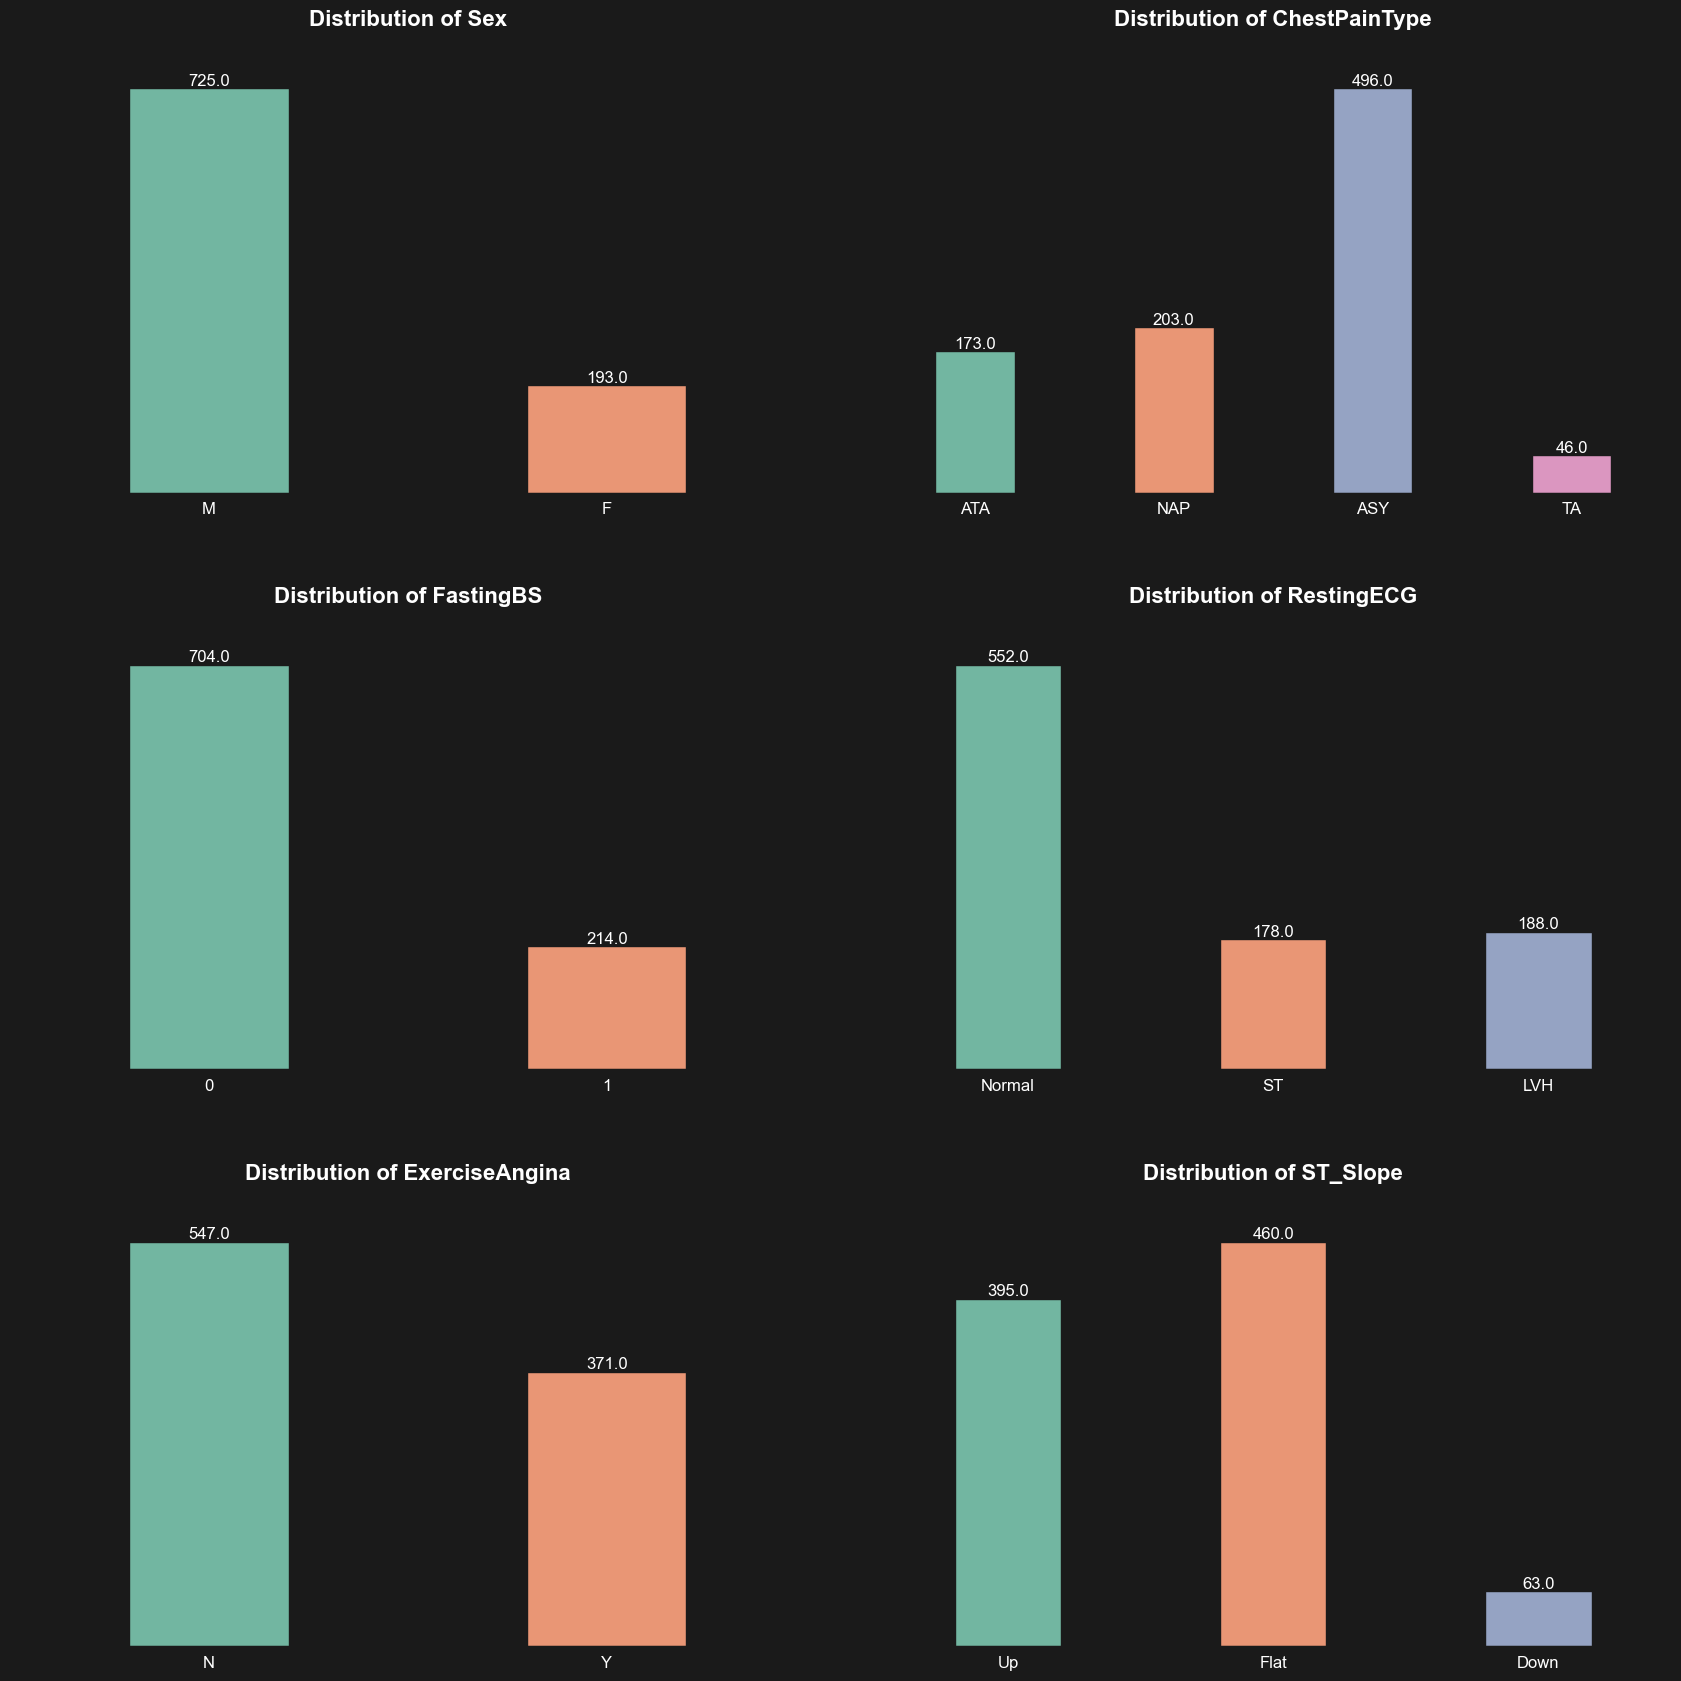

In [7]:
# List of categorical columns
categorical_columns = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Set up the subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot bar charts for each categorical column
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax, palette=("Set2"), hue=col, legend=False, edgecolor="#1a1a1a", width=.4)
    
    # Add titles and labels
    ax.set_title(f'Distribution of {col}', pad=30)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([])
    
    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=12, color='white', xytext=(0, 5),
                    textcoords='offset points')

# Adjust layout for better spacing
plt.tight_layout(pad=5)
plt.show()

### Distribution of Categorical Variables

Here is an analysis of the distributions of the categorical variables:

1. **Sex**:
   - There are significantly more male patients (725) compared to female patients (193). This suggests that the dataset is imbalanced in terms of gender distribution.

2. **ChestPainType**:
   - The most common chest pain type is **ASY** (496), followed by **NAP** (203), **ATA** (173), and **TA** (46). The large number of **ASY** cases could indicate its prevalence in this dataset, while **TA** appears relatively rare.

3. **FastingBS**:
   - The variable `FastingBS` has two categories: **0** (704) and **1** (214). **0** seems to be the dominant category, suggesting that most patients have a fasting blood sugar level less than 120 mg/dL, with only a minority exceeding this threshold.

4. **RestingECG**:
   - The majority of patients have a **Normal** resting ECG (552), followed by **LVH** (188) and **ST** (178). This implies that abnormal ECG results are less common in this dataset.

5. **ExerciseAngina**:
   - A higher number of patients do not have exercise-induced angina (**N**, 547) compared to those who do (**Y**, 371). This suggests that exercise-induced angina is less prevalent in the dataset.

6. **ST_Slope**:
   - Most patients have a **Flat** slope (460), followed by **Up** (395) and **Down** (63). This indicates that the **Flat** ST slope is the most common type observed in this dataset.

In general, these distributions suggest that there are some imbalances in the data (such as the larger number of males and certain chest pain types), and there are fewer cases of specific conditions, such as exercise-induced angina and abnormal ST slopes.

# Categorical Distributions by Heart Disease

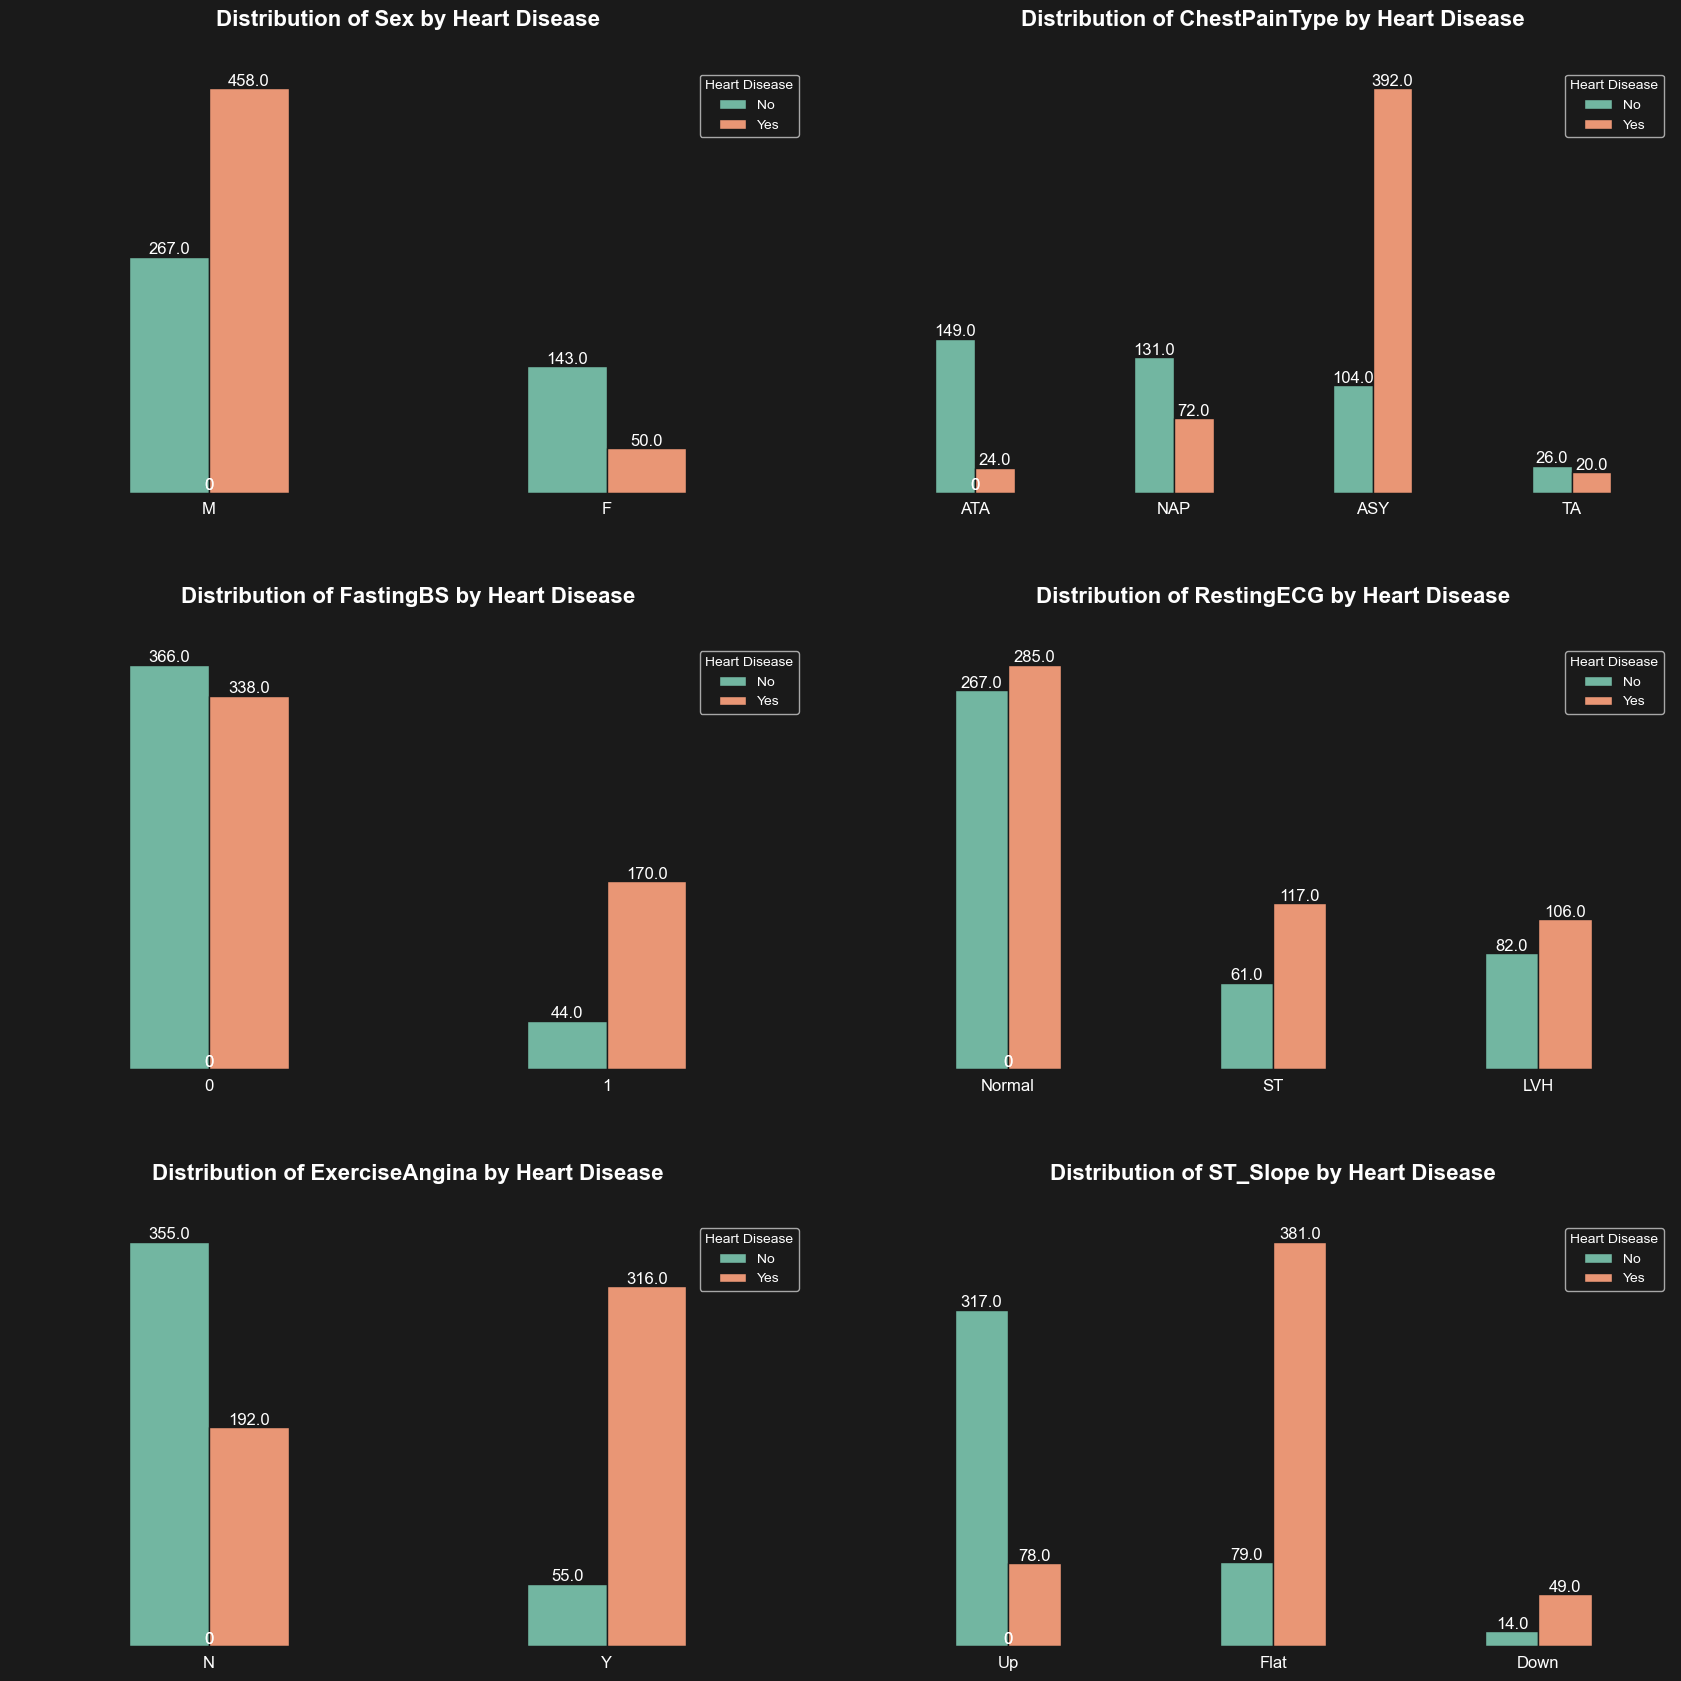

In [10]:
# Set up the subplots
fig, axes = plt.subplots(3, 2, figsize=(18, 18))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot bar charts for each categorical column
for i, col in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(data=df, x=col, ax=ax, palette='Set2', hue='HeartDisease', edgecolor="#1a1a1a", width=.4)
    
    # Add titles and labels
    ax.set_title(f'Distribution of {col} by Heart Disease', pad=30)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_yticks([])
    
    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=12, color='white',
                    xytext=(0, 5), textcoords='offset points')

    # Add a legend
    leg = ax.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'], labelcolor='white')
    
    # Change the title color of the legend
    leg.get_title().set_color('white')

# Adjust layout for better spacing
plt.tight_layout(pad=5)
plt.show()

### Heart Disease Analysis by Categorical Variables

The following analysis provides a breakdown of heart disease occurrences across various categorical columns:

1. **Sex**: 
   - **Males (M)** have a significantly higher number of heart disease cases (458) compared to **females (F)**, who have only 50 cases. This may suggest a higher prevalence of heart disease in men in this dataset.

2. **ChestPainType**: 
   - The **ASY** (asymptomatic) chest pain type is the most common among individuals with heart disease, with 392 cases. 
   - **ATA** (angina) and **NAP** (non-angina) follow with 24 and 72 cases, respectively. 
   - **TA** (typical angina) has the least cases (20). This indicates that heart disease is most common in those experiencing asymptomatic chest pain.

3. **FastingBS**:
   - Individuals with **FastingBS = 0** (normal blood sugar) account for 338 cases of heart disease, while those with **FastingBS = 1** (high blood sugar) account for 170 cases. This shows that both normal and high blood sugar levels are prevalent among those with heart disease, with the higher count of heart disease cases in the **FastingBS = 0** group.

4. **RestingECG**:
   - Among individuals with heart disease, **LVH** (left ventricular hypertrophy) has 106 cases, **Normal** has 285 cases, and **ST** (ST-segment abnormality) has 117 cases. These numbers suggest that heart disease is most common in individuals with a normal resting ECG, although the other two categories also contribute significantly.

5. **ExerciseAngina**:
   - A high number of heart disease cases are associated with **ExerciseAngina = Y** (316 cases), compared to **ExerciseAngina = N** (192 cases). This shows that exercise-induced angina is a common indicator of heart disease.

6. **ST_Slope**:
   - **Flat** has the most cases (381) of heart disease, followed by **Up** (78 cases) and **Down** (49 cases). This distribution indicates that individuals with a flat ST slope during exercise are more likely to have heart disease.

In summary, the dataset shows certain trends, such as a higher likelihood of heart disease among males, individuals with asymptomatic chest pain, and those with a flat ST slope during exercise. Further analysis and modeling could help in identifying stronger predictors of heart disease in this dataset.

# Numerical Distributions & Outliers

In [13]:
# List of numerical columns
numerical_columns = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# Create a dataframe with summary statistics
summary_df = df[numerical_columns].describe().T

# Add IQR and outlier boundaries
summary_df['IQR'] = summary_df['75%'] - summary_df['25%']
summary_df['Lower Bound'] = summary_df['25%'] - 1.5 * summary_df['IQR']
summary_df['Upper Bound'] = summary_df['75%'] + 1.5 * summary_df['IQR']

# Display the dataframe
summary_df

,count,mean,std,min,25%,50%,75%,max,IQR,Lower Bound,Upper Bound
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0,13.00,27.500,79.500
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0,20.00,90.000,170.000
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0,93.75,32.625,407.625
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0,36.00,66.000,210.000
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2,1.50,-2.250,3.750


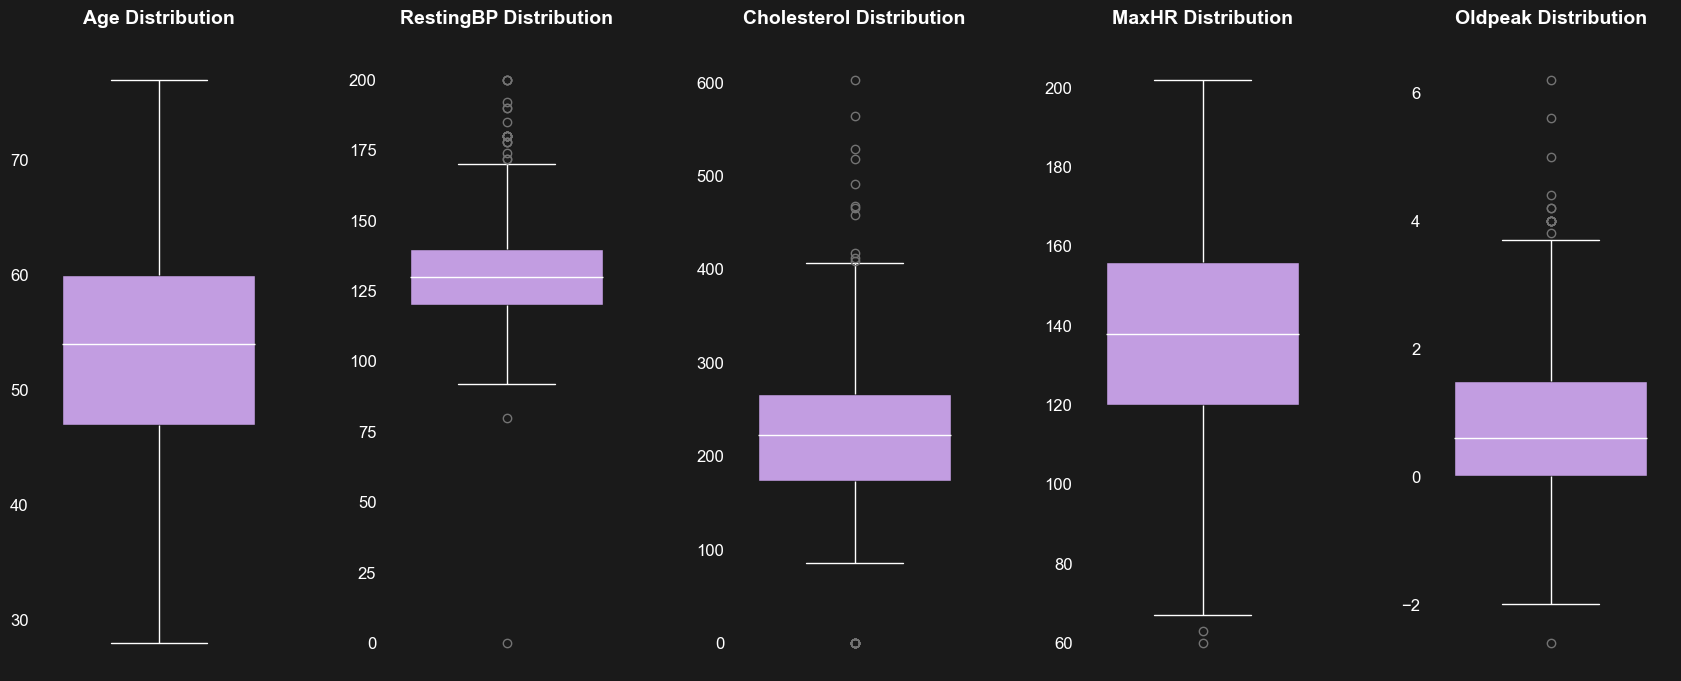

In [14]:
# Set up the subplots
fig, axes = plt.subplots(1, 5, figsize=(18, 8))

# Plot box plots for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    sns.boxplot(data=df, y=col, ax=ax, color='#c392ec', boxprops=dict(edgecolor="#1a1a1a"), 
                medianprops=dict(color="white"), whiskerprops=dict(color="white"), capprops=dict(color="white"))
    
    ax.set_title(f'{col} Distribution', fontsize=14, pad=20)
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.grid(False)

# Adjust layout for better spacing
plt.tight_layout(pad=5)
plt.show()

# Analysis of Numerical Distributions

## Age  
- The average age in the dataset is **53.5 years**, with a standard deviation of **9.43 years**.  
- The data ranges from **28 to 77 years**, which seems reasonable for a heart disease study.  
- No extreme outliers based on the lower (**28**) and upper (**77.5**) bounds.  

## Resting Blood Pressure (RestingBP)  
- The average resting blood pressure is **132.4 mmHg**, with a standard deviation of **18.51 mmHg**.  
- The **minimum value is 0**, which is clearly an error.  
- The interquartile range (IQR) suggests that normal values should fall between **90 and 170 mmHg**, meaning some values above **170 mmHg** might be potential outliers.  

## Cholesterol  
- The average cholesterol level is **198.8 mg/dL**, with a high standard deviation of **109.38 mg/dL**.  
- The **minimum value is 0**, which is unrealistic and likely represents missing data.  
- The IQR suggests values above **407.6 mg/dL** could be outliers, with the highest recorded value being **603 mg/dL**, indicating the presence of extreme values.  

## Maximum Heart Rate (MaxHR)  
- The average MaxHR is **136.8 bpm**, with a standard deviation of **25.46 bpm**.  
- The data ranges from **60 to 202 bpm**, with an upper bound of **210 bpm**, suggesting no major outliers.  

## ST Depression (Oldpeak)  
- The average Oldpeak value is **0.89**, with a standard deviation of **1.07**.  
- There is a **negative value (-2.6)**, which is unexpected and likely an error.  
- The upper bound for potential outliers is **3.75**, and the highest recorded value is **6.2**, indicating possible extreme values.  

## Summary of Issues Identified  
1. **RestingBP has incorrect zero values** that need to be addressed.  
2. **Cholesterol has zero values**, which are likely missing values.  
3. **Oldpeak contains a negative value (-2.6)**, which may need investigation.  
4. **Potential outliers in Cholesterol (>407.6 mg/dL) and Oldpeak (>3.75)** require further review.  

# Data Cleaning & Preprocessing

## Handling Potential Data Issues in RestingBP and Cholesterol

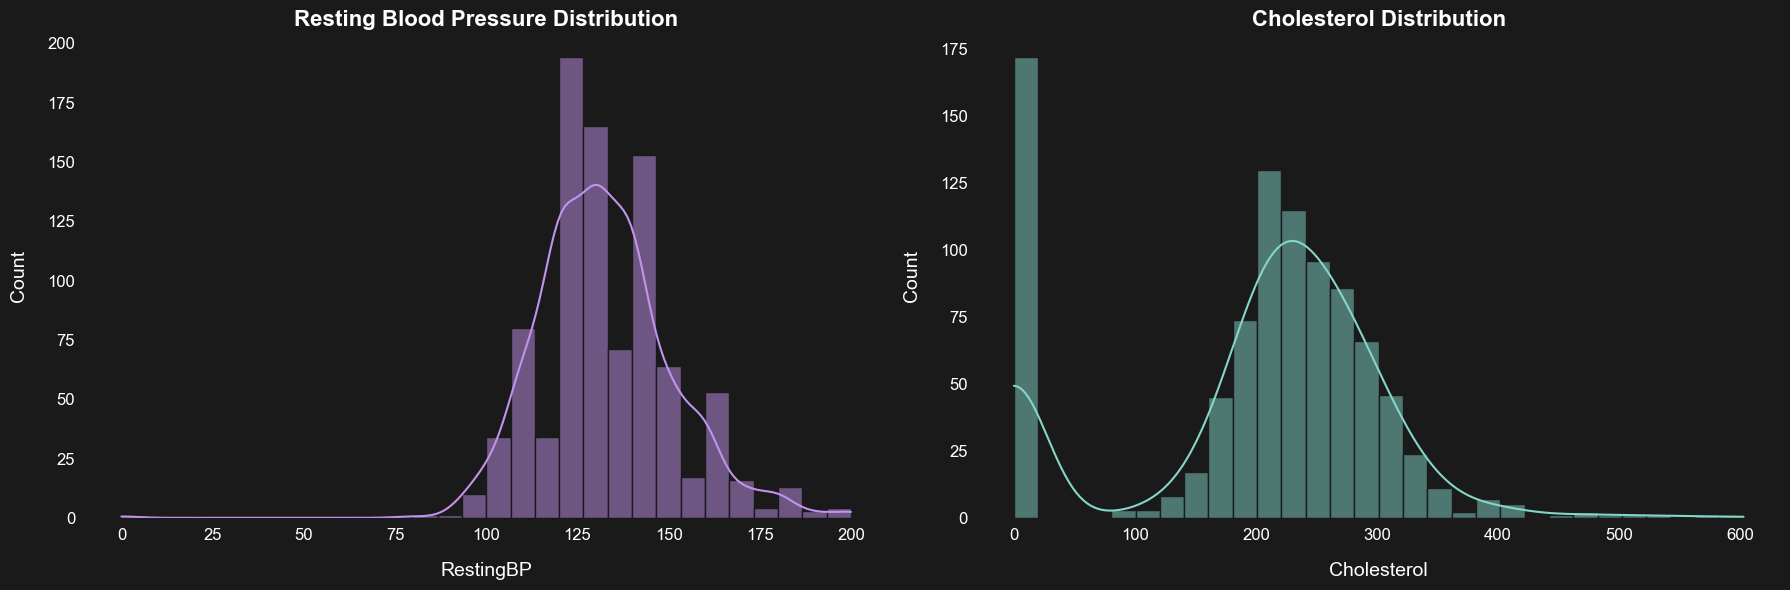

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Two subplots side by side

# RestingBP Distribution
sns.histplot(df["RestingBP"], bins=30, kde=True, color="#c392ec", ax=axes[0], edgecolor="#1a1a1a")
axes[0].set_title("Resting Blood Pressure Distribution", color="white")
axes[0].set_xlabel("RestingBP")
axes[0].set_ylabel("Count")

# Cholesterol Distribution
sns.histplot(df["Cholesterol"], bins=30, kde=True, color="#85d5c8", ax=axes[1], edgecolor="#1a1a1a")
axes[1].set_title("Cholesterol Distribution", color="white")
axes[1].set_xlabel("Cholesterol")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

## Data Issues in RestingBP and Cholesterol

### RestingBP  
- The distribution revealed that **one data point had a value of 0**, which is not physiologically valid.  
- Since there is only one incorrect value, replacing it with the **median** is the most straightforward fix.  

### Cholesterol  
- The dataset contains **172 records with a cholesterol value of 0**, which is unrealistic since cholesterol levels are always positive.  
- The distribution suggests that there is **no strong curvature**, making **linear interpolation** a suitable approach.
- Also, some values exceeded **500 mg/dL**, which is rare and considered extremely high. These should be capped at **500 mg/dL** to maintain realistic ranges.

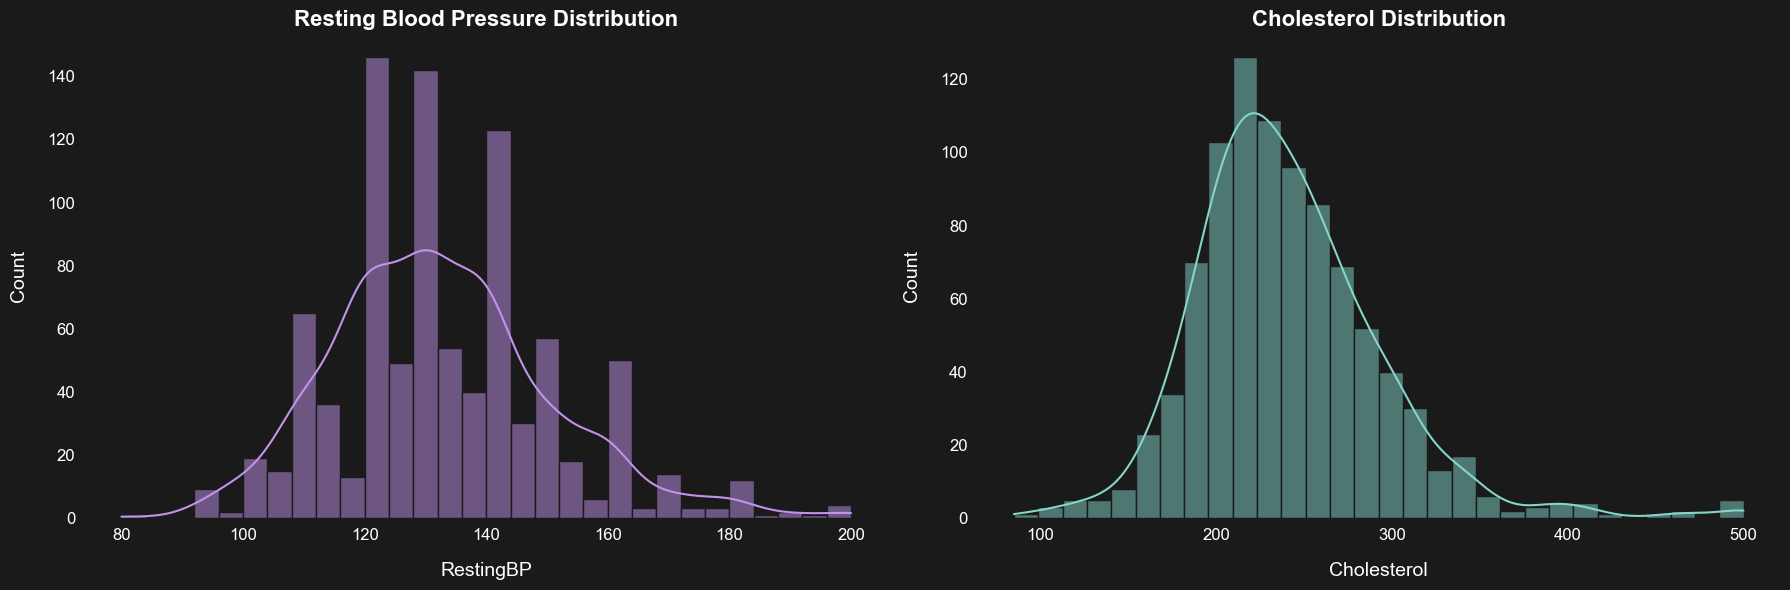

In [19]:
# Import necessary libraries
import numpy as np

# Fixing RestingBP
# Replace the incorrect 0 value with the median
median_bp = df.loc[df["RestingBP"] > 0, "RestingBP"].median()
df["RestingBP"] = df["RestingBP"].replace(0, median_bp)

# Fixing Cholesterol
# Replace 0s with NaN first (so they can be interpolated)
df["Cholesterol"] = df["Cholesterol"].replace(0, np.nan)

# Apply linear interpolation
df["Cholesterol"] = df["Cholesterol"].interpolate(method="linear")

# Cap the cholesterol values at 500 mg/dL
df["Cholesterol"] = df["Cholesterol"].clip(upper=500)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # Two subplots side by side

# RestingBP Distribution
sns.histplot(df["RestingBP"], bins=30, kde=True, color="#c392ec", ax=axes[0], edgecolor="#1a1a1a")
axes[0].set_title("Resting Blood Pressure Distribution", color="white")
axes[0].set_xlabel("RestingBP")
axes[0].set_ylabel("Count")

# Cholesterol Distribution
sns.histplot(df["Cholesterol"], bins=30, kde=True, color="#85d5c8", ax=axes[1], edgecolor="#1a1a1a")
axes[1].set_title("Cholesterol Distribution", color="white")
axes[1].set_xlabel("Cholesterol")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

## Analysis of the Fixed Values  

### RestingBP  
- The **single incorrect value (0)** has been replaced with the median, which maintains consistency with the distribution.  

### Cholesterol  
- The **previous 0 values** have been successfully interpolated using a **linear method**, ensuring a smooth distribution.  
- Extreme values have been **capped at 500 mg/dL**, preventing unrealistic cholesterol levels.  
- The final distribution appears **continuous and realistic**, avoiding large artificial gaps while preserving the overall structure.  

# Handling Negative Values and Potential Outliers in Oldpeak

In [22]:
df['Oldpeak'].value_counts(bins=10).sort_index()

(-2.61, -1.72]      2
(-1.72, -0.84]      5
(-0.84, 0.04]     374
(0.04, 0.92]      118
(0.92, 1.8]       236
(1.8, 2.68]       119
(2.68, 3.56]       44
(3.56, 4.44]       17
(4.44, 5.32]        1
(5.32, 6.2]         2
Name: count, dtype: int64

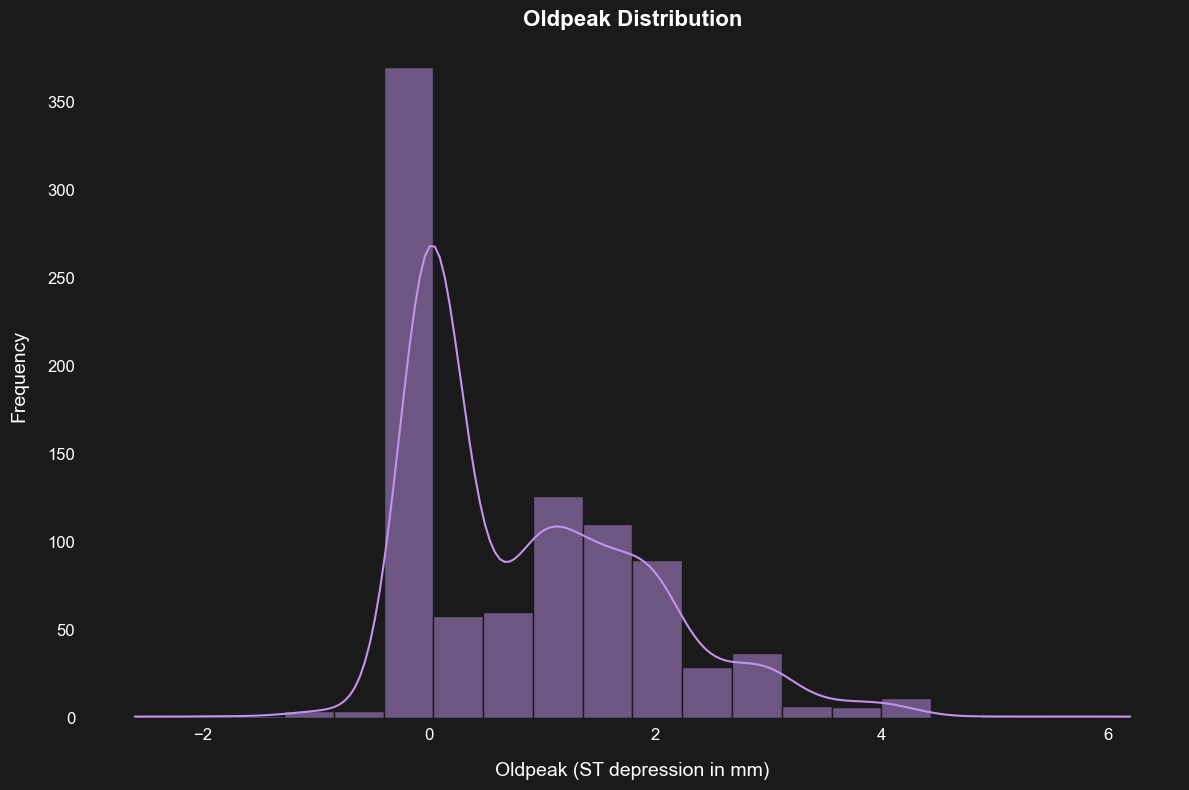

In [23]:
# Visualize the distribution of Oldpeak after taking absolute values
plt.figure(figsize=(12, 8))
sns.histplot(df['Oldpeak'], bins=20, kde=True, color="#c392ec", edgecolor="#1a1a1a")

# Add labels and title
plt.title('Oldpeak Distribution')
plt.xlabel('Oldpeak (ST depression in mm)')
plt.ylabel('Frequency')

# Show the plot
plt.tight_layout()
plt.show()

## Issue with Oldpeak Values

The "Oldpeak" feature represents the depression of the ST segment during exercise and is typically a non-negative value, as ST depression is a measure of ischemia (restricted blood flow) that can't be negative. However, the dataset contains several negative values for Oldpeak, such as -2.6, -2.0, and -1.5, which are not physiologically meaningful in this context. These negative values might stem from data entry errors, measurement errors, or incorrect encoding of the feature.

### Chosen Method to Fix the Issue

To address the issue, I decided to set the negative Oldpeak values to their absolute values, effectively converting all negative values into positive ones. This method was chosen because:

1. **ST Depression is Non-negative**: Since Oldpeak represents a physiological measure (ST depression) that cannot logically be negative, taking the absolute value ensures that the data aligns with the expected range of values.
2. **Simplicity**: Replacing negative values with their absolute values is a straightforward approach that ensures all records maintain valid, meaningful values without introducing significant bias or loss of information.
3. **Consistency**: This approach avoids arbitrarily assigning negative values to a different baseline, such as setting them to 0, which could distort the actual magnitude of the depression in some cases.

Thus, by transforming the negative values to their absolute counterparts, we preserve the consistency and accuracy of the dataset while correcting the issue with minimal disruption to the overall distribution of Oldpeak values.

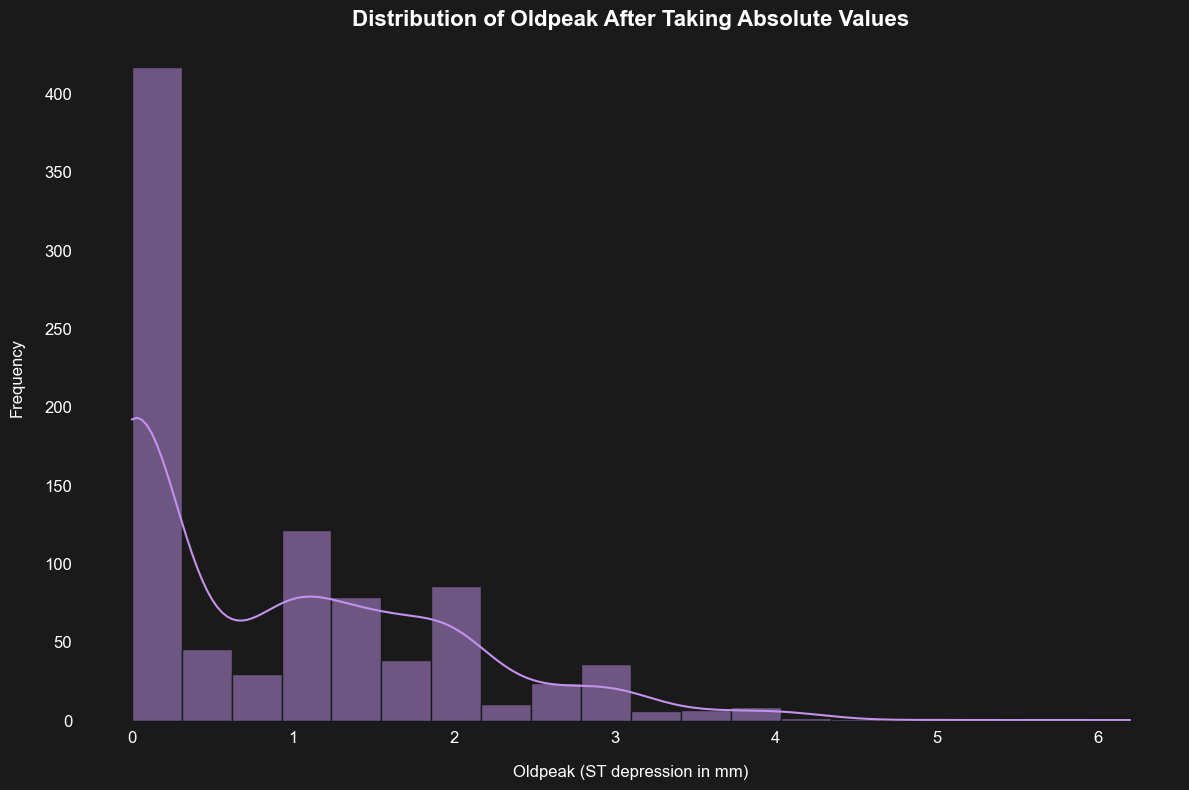

In [25]:
# Taking the Absolute Value of Oldpeak
df["Oldpeak"] = df["Oldpeak"].abs()

# Visualize the distribution of Oldpeak after taking absolute values
plt.figure(figsize=(12, 8))
sns.histplot(df['Oldpeak'], bins=20, kde=True, color="#c392ec", edgecolor="#1a1a1a")

# Add labels and title
plt.title('Distribution of Oldpeak After Taking Absolute Values', fontsize=16)
plt.xlabel('Oldpeak (ST depression in mm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Feature Selection

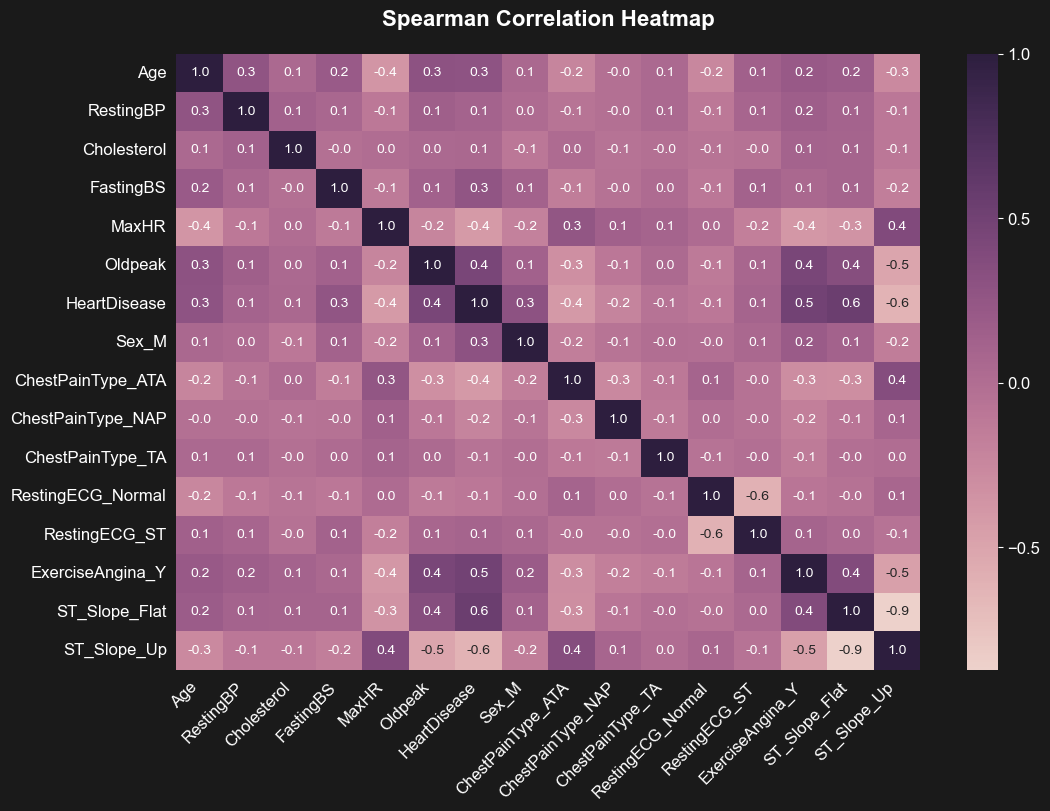

In [27]:
# Convert categorical variables into dummy variables (one-hot encoding)
# drop_first=True avoids multicollinearity by dropping the first category of each feature
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute the correlation matrix using Spearman's rank correlation
# Spearman is used because it captures monotonic relationships, even if they are not linear
corr_matrix = df_encoded.corr(method='spearman')

# Set up figure
plt.figure(figsize=(12, 8))

# Create heatmap
ax = sns.heatmap(
    corr_matrix,
    cmap=sns.cubehelix_palette(as_cmap=True),
    annot=True,
    linewidths=0,
    linecolor="#1a1a1a",
    fmt=".1f",
    cbar_kws={"ticks": [-1, -0.5, 0, 0.5, 1]}
)

# Customize xticks
plt.xticks(rotation=45, ha='right')

# Add title
plt.title("Spearman Correlation Heatmap", pad=20)

# Display plot
plt.show()

In [28]:
# Extract absolute correlations with the target variable (HeartDisease)
correlations = abs(corr_matrix["HeartDisease"])

# Set the minimum correlation threshold
threshold = 0.1

# Select features that have a correlation greater than the threshold
selected_features = correlations[correlations > threshold].index.drop("HeartDisease")

# Nicely print the selected features
print("\nSelected Features (|Spearman correlation| ≥ 0.1 with HeartDisease):\n")
for feature in selected_features:
    print(f"- {feature}")


Selected Features (|Spearman correlation| ≥ 0.1 with HeartDisease):

- Age
- RestingBP
- FastingBS
- MaxHR
- Oldpeak
- Sex_M
- ChestPainType_ATA
- ChestPainType_NAP
- RestingECG_ST
- ExerciseAngina_Y
- ST_Slope_Flat
- ST_Slope_Up


## Feature Selection Process  

### Encoding Categorical Variables  
To prepare our dataset for modeling, we converted categorical variables into numerical form using **one-hot encoding**. This method creates binary columns for each category within a feature, allowing the model to process categorical data effectively. We set `drop_first=True` to avoid multicollinearity, ensuring that redundant categories do not interfere with the model.  

### Choosing a Correlation Coefficient  
We used **Spearman's rank correlation** to measure the relationship between each feature and the target variable, **HeartDisease**. Unlike Pearson correlation, which captures only linear relationships, Spearman correlation detects **monotonic** relationships, making it more suitable for our dataset, where feature relationships may not be strictly linear.  

### Setting a Correlation Threshold  
To select the most relevant features, we applied a threshold of **0.1** for the absolute Spearman correlation with HeartDisease. This value ensures that we include only features with a meaningful association while avoiding the inclusion of weakly correlated variables that may introduce noise into the model.  

### Selected Features  
After applying the threshold, we identified the following features with a correlation of at least **|0.1|** with HeartDisease:  

- **Numerical Features:**  
  - Age  
  - RestingBP  
  - FastingBS  
  - MaxHR  
  - Oldpeak  

- **Encoded Categorical Features:**  
  - Sex_M  
  - ChestPainType_ATA  
  - ChestPainType_NAP  
  - RestingECG_ST  
  - ExerciseAngina_Y  
  - ST_Slope_Flat  
  - ST_Slope_Up  

These selected features will be used in our predictive modeling phase, as they show the strongest relationships with heart disease presence.

# Building k-NN Classifiers With Individual Features

In [31]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Select the features to be used for training
X = df_encoded[selected_features]  # Using the features selected earlier
y = df_encoded['HeartDisease']  # Target variable

# Define split percentage and ensure reproducibility
random_state = 42
test_size = 0.3  

# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state
)

# Set number of neighbors
k = 5  

# Iterate through selected features
for feature in selected_features:
    # Initialize and train the model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train[[feature]], y_train)

    # Predict on the validation set
    y_pred = knn.predict(X_val[[feature]])

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)

    # Print results
    print(f"Feature: {feature:<20} Accuracy: {accuracy:.4f}")

Feature: Age                  Accuracy: 0.6123
Feature: RestingBP            Accuracy: 0.5362
Feature: FastingBS            Accuracy: 0.5942
Feature: MaxHR                Accuracy: 0.6413
Feature: Oldpeak              Accuracy: 0.6775
Feature: Sex_M                Accuracy: 0.6812
Feature: ChestPainType_ATA    Accuracy: 0.7283
Feature: ChestPainType_NAP    Accuracy: 0.5942
Feature: RestingECG_ST        Accuracy: 0.5942
Feature: ExerciseAngina_Y     Accuracy: 0.6993
Feature: ST_Slope_Flat        Accuracy: 0.5942
Feature: ST_Slope_Up          Accuracy: 0.8007


## Model Performance Overview

Among all the selected features, the **ST_Slope_Up** feature achieved the highest accuracy of **80.07%**, outperforming the others by a notable margin. This indicates that the presence of an upward slope in the ST segment of the ECG could be a strong indicator of heart disease, as it might signify ischemic changes during exercise.

On the other hand, the features **RestingBP**, **FastingBS**, **ChestPainType_NAP**, **RestingECG_ST**, and **ST_Slope_Flat** produced relatively lower accuracies (around **59-59%**), suggesting that these features alone might not offer sufficient predictive power in isolation. This could be due to their potential lack of strong discriminative capability in predicting heart disease, or possibly that these features are correlated with each other and may not capture unique, non-redundant information.

Overall, **ST_Slope_Up** appears to be the most meaningful feature in predicting heart disease when used alone with the k-NN classifier in this case.

# Building k-NN Classifier With All Selected Features

In [34]:
# Import necessary libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

# Normalize data using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter grid for grid search
grid_params = {
    'n_neighbors': list(range(1, 51, 2)),  # Only odd numbers to avoid ties
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'hamming'],
    'weights': ['uniform', 'distance']  # Test equal weights vs. distance-based
}

# Initialize KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform Grid Search with cross-validation (5-fold) to find the best parameters
knn_grid = GridSearchCV(knn_classifier, grid_params, scoring='accuracy', cv=5, n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)

# Best parameters and accuracy
best_score = knn_grid.best_score_
best_params = knn_grid.best_params_

# Print the best model's accuracy and parameters
print(f"Best model's accuracy: {best_score*100:.2f}%")
print(f"Best model's parameters: {best_params}")

# Evaluate the best model on the test set
test_accuracy = knn_grid.best_estimator_.score(X_test_scaled, y_test)
print(f"Model's score on the test set: {test_accuracy*100:.2f}%")

Best model's accuracy: 86.29%
Best model's parameters: {'metric': 'hamming', 'n_neighbors': 15, 'weights': 'distance'}
Model's score on the test set: 86.23%


In [35]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV

# Define hyperparameter space
random_params = {
    'n_neighbors': np.arange(1, 101, 2),  # Odd values from 1 to 100
    'metric': ["euclidean", "manhattan", "chebyshev", "minkowski"],
    'p': [1, 2, 3],  # Minkowski power values
    'weights': ["uniform", "distance"],
    'algorithm': ["auto", "ball_tree", "kd_tree", "brute"],
    'leaf_size': np.arange(10, 51, 10),  # Values from 10 to 50 in steps of 10
}

# Perform RandomizedSearchCV
knn_random = RandomizedSearchCV(
    knn_classifier, 
    random_params, 
    n_iter=30,  # Randomly test 30 different combinations
    scoring='accuracy', 
    cv=5, 
    n_jobs=-1, 
    random_state=random_state
)

# Fit the model on the training data
knn_random.fit(X_train_scaled, y_train)

# Get the best results
best_score = knn_random.best_score_
best_params = knn_random.best_params_

# Print best results
print(f"Best model's accuracy: {best_score*100:.2f}%")
print(f"Best model's parameters: {best_params}")

# Evaluate the best model on the test set
accuracy = knn_random.best_estimator_.score(X_test_scaled, y_test)
print(f"Model's accuracy on the test set: {accuracy*100:.2f}%")

Best model's accuracy: 85.35%
Best model's parameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 33, 'metric': 'manhattan', 'leaf_size': 10, 'algorithm': 'ball_tree'}
Model's accuracy on the test set: 85.51%
